# Our tasks today is to:
### 1. Explore the data.
### 2. Preprocess the data
* Clean the data.
* Fill missing values.
### 3. Visualize the data.
### 4. Save the dataframe.

# Import libraries & Load the data

In [835]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [836]:
df = pd.read_csv('Used_Cars.csv')

# 1- EDA

## Lets first get to know the dataset, how many columns, rows, number of null values, and what are the data types

In [837]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


#### The DataFrame contains 6,019 entries and 14 columns. Here's what we can get out of it:

0. `Unnamed`: 0: Integer, no missing values.
1. `Name`: Object, no missing values.
2. `Location`: Object, no missing values.
3. `Year`: Integer, no missing values.
4. `Kilometers_Driven`: Integer, no missing values.
5. `Fuel_Type`: Object, no missing values.
6. `Transmission`: Object, no missing values.
7. `Owner_Type`: Object, no missing values.
8. `Mileage`: Object, 2 missing values.
9. `Engine`: Object, 36 missing values.
10. `Power`: Object, 36 missing values.
11. `Seats`: Float, 42 missing values.
12. `New_Price`: Object, many missing values (only 824 non-null).
13. `Price`: Float, no missing values.
Some columns have missing values, and some object columns might need conversion to numeric types for analysis.

## Now Lets have a look at the dataset.

### First lets take a look at the first 5 rows in the dataframe!

In [838]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Now lets have a look at the last 5 rows in the dataframe!

In [839]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


### Now lets take a random sample from dataframe!

In [840]:
df.sample()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4361,4361,Skoda Rapid 1.5 TDI Ambition,Mumbai,2012,54500,Diesel,Manual,First,21.13 kmpl,1498 CC,108.4 bhp,5.0,13.72 Lakh,4.1


#### As we can see there is a coloumn that is not usefull to us which is `Unnamed: 0`; this appears to be like an index to the dataset. This is a note we have to keep in mind, now lets check for other properities in the dataframe.

## Now lets have a look at the statistical information of the dataframe

In [841]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


Based on the statistical information we got, here are some insights and potential steps for data preprocessing:

1. **Missing or Zero Values**:
   - **Seats**: The minimum value is 0, which is likely incorrect, suggesting missing or erroneous data. These should be checked and possibly imputed or removed.
   - **Kilometers_Driven and Price**: The presence of very low minimum values might indicate anomalies or errors that need further investigation.

2. **Outliers**:
   - **Kilometers_Driven**: The maximum value is 6,500,000, which is exceptionally high and could be an outlier or error. Outlier detection methods should be used to identify and handle such values.
   - **Price**: The wide range and maximum value of 160 could also suggest outliers. Further analysis is required to determine if these are genuine or errors.

3. **Distribution and Scaling**:
   - **Kilometers_Driven and Price**: The high standard deviations suggest these variables have a wide range of values. Normalization or standardization may be necessary to ensure these variables contribute appropriately to any models.

4. **Data Consistency**:
   - **Year**: The range from 1998 to 2019 seems reasonable, but it's important to ensure the year values are consistent and correct, particularly if more recent data is expected.

5. **Imputation**:
   - **Seats**: Since there are some missing values, decide on an imputation method (mean, median, mode, or using a model-based approach) to fill in these gaps.

6. **Feature Engineering**:
   - You might want to create new features or modify existing ones to better capture the relationships in the data, such as categorizing years into age groups or creating a "mileage per year" feature.

By addressing these issues, the data will be cleaner and more suitable for analysis or modeling tasks.

## Now lets check for the null values.

In [842]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

#### Well, thats a low price for 5,195 cars. As we can see it is the most column with null values we will try to solve this issue later.

## Now lets check for duplicate rows

In [843]:
df.duplicated().sum()

0

#### This is great, this means less work for us. However duplicate rows some times can be healthy 
Dropping duplicate rows in a dataframe before passing it to a machine learning algorithm can be important, depending on the nature of the data and the machine learning algorithm being used.

Duplicate rows can affect the performance of a machine learning algorithm in several ways.

For example:

1. Bias: Duplicate rows can bias the model towards certain features or outcomes, leading to overfitting and poor generalization to new data.

2. Efficiency: Duplicate rows increase the computational cost of training the model, as the algorithm may need to process the same data multiple times.

3. Data imbalance: Duplicate rows can also create an imbalance in the data, which can affect the accuracy of the model.

Therefore, it is generally a good practice to remove duplicate rows from the data before training a machine learning algorithm. This can be done using the drop_duplicates() method in Pandas, or other similar methods in other programming languages.

However, it is important to note that there may be cases where duplicate rows are actually informative and should not be removed. For example, in some time-series datasets, it is common to have multiple observations of the same event at different time points. In these cases, removing duplicate rows may actually remove important information from the dataset. So, it's always important to carefully consider the nature of the data and the goals of the analysis before deciding whether or not to remove duplicate rows.
##### [source](https://www.kaggle.com/thabres)

## Now we have enough information to start the preprocessing!

# 2- Preprocessing

### Indexing
As you know, the `Unnamed: 0`column is and index so lets make it the index to the dataset and lets also rename it!

In [844]:
df = df.rename(columns={'Unnamed: 0': 'ID'})

In [845]:
df = df.set_index('ID')

### Clean numerical columns

In [846]:
# Remove the 'CC' from the 'Engine' column
df['Engine'] = df['Engine'].apply(lambda x: str(x).replace(' CC', ''))
# First lets make null value to -1 just so we can change the data type to int
# In case it is not np.nan, we will also replace 'nan' to -1
df['Engine'] = df['Engine'].replace('nan', np.nan)
df['Engine'] = df['Engine'].fillna('-1')
# Now we change the data type to int
df['Engine'] = df['Engine'].astype(float)
# Now lets replace -1 to np.nan
df['Engine'] = df['Engine'].replace(-1, np.nan)
print(df['Engine'].dtype)
print(df['Engine'].unique())

float64
[ 998. 1582. 1199. 1248. 1968.  814. 1461. 2755. 1598. 1462. 1497. 2179.
 2477. 1498. 2143. 1995. 1984. 1197. 2494. 1798. 2696. 2698. 1061. 1198.
 2987.  796.  624. 1999. 1991. 2694. 1120. 2498.  799. 2393. 1399. 1796.
 2148. 1396. 1950. 4806. 1998. 1086. 1193. 2982. 1493. 2967. 2993. 1196.
 1799. 2497. 2354. 1373. 2996. 1591. 2894. 5461. 1595.  936. 1997.   nan
 1896. 1390. 1364. 2199.  993.  999. 1405. 2956. 1794.  995. 2496. 1599.
 2400. 1495. 2523.  793. 4134. 1596. 1395. 2953. 1586. 2362. 1496. 1368.
 1298. 1956. 1299. 3498. 2835. 1150. 3198. 1343. 1499. 1186. 1590. 2609.
 2499. 2446. 1978. 2360. 3436. 2198. 4367. 2706. 1422. 2979. 1969. 1489.
 2489. 1242. 1388. 1172. 2495. 1194. 3200. 1781. 1341. 2773. 3597. 1985.
 2147. 1047. 2999. 2995. 2997. 1948. 2359. 4395. 2349. 2720. 1468. 3197.
 2487. 1597. 2771.   72. 4951.  970. 2925. 2200. 5000. 2149. 5998. 2092.
 5204. 2112. 1797.]


In [847]:
df['New_Price'] = df['New_Price'].apply(lambda x: str(x).replace(' Lakh', ''))
df['New_Price'] = df['New_Price'].apply(lambda x: float(str(x).replace(' Cr', ''))*100)

df['New_Price'] = df['New_Price'].replace('nan', np.nan)
df['New_Price'] = df['New_Price'].replace('null', np.nan)
df['New_Price'] = df['New_Price'].fillna('-1')

df['New_Price'] = df['New_Price'].astype(float)

df['New_Price'] = df['New_Price'].replace(-1, np.nan)

print(df['New_Price'].dtype)
print(df['New_Price'].unique())

float64
[  nan  861. 2100. 1065. 3201. 4787. 1057. 1233. 1112. 2364. 1864. 1934.
 4914. 1181. 1665.  667.  645.  641. 2700.  513. 5443.  951.  996. 1444.
  453. 9504. 1349.  128. 6088.  739. 6947.  878. 1274. 1052. 1198.  854.
 3358.  912.  529. 4428. 2074. 1174. 2552. 1407. 9513.  834.  885. 2540.
 1667. 7943.  662.  104. 5867. 2837.  448. 7264. 3615. 4459. 1200. 1465.
 5372. 3391. 1251.  974. 9538. 6059. 1128. 1148. 1126. 4365. 6207. 8697.
  100.  474. 1484. 4949. 4818. 1234. 1538. 1921. 2295. 1115. 1032. 2805.
 5977. 1586. 1943. 4212. 1695. 1545.  787.  470. 1502. 1256. 1133. 2645.
 1034.  746. 1185. 1041.  557. 4248. 1604.  910.  765. 1374.  572. 2133.
 7876.  429. 1004. 1167.  856.  478.  614.  730.  437.  498. 1529. 2426.
 7512.  953. 3460. 5226. 7043.  480. 1212. 1937. 1214. 3669. 2368. 5561.
 1410. 1326. 1127. 1120.  946. 1279. 1557. 1986.  659.  654. 2656. 1505.
 1101. 1100.  755.  782.  632. 1514. 1572. 4567. 5470. 2287.  674. 3309.
 2325. 1927. 5277.  792.  785. 1555. 3245. 

In [848]:

df['Power'] = df['Power'].apply(lambda x: str(x).replace(' bhp', ''))

df['Power'] = df['Power'].replace('nan', np.nan)
df['Power'] = df['Power'].replace('null', np.nan)
df['Power'] = df['Power'].fillna('-1')

df['Power'] = df['Power'].astype(float)

df['Power'] = df['Power'].replace(-1, np.nan)
print(df['Power'].dtype)
print(df['Power'].unique())

float64
[ 58.16  126.2    88.7    88.76  140.8    55.2    63.1   171.5   103.6
  74.    103.25  116.3   187.7   115.    175.56   98.6    83.8   167.62
 190.     88.5   177.01   80.     67.1   102.    108.45  138.1   184.
 179.5   103.5    64.     82.    254.8    73.9    46.3    37.5    77.
  82.9   149.92  138.03  112.2   163.7    71.    105.    174.33   75.
 103.2    53.3    78.9   147.6   147.8    68.    186.    170.     69.
 140.     78.    194.    500.    108.5    86.8   187.74      nan 132.
  86.7    73.94  117.3   218.    168.5    89.84  110.     90.     82.85
  67.    241.4    35.    270.9   126.32   73.    130.    100.6   150.
  75.94  215.    107.3    37.48  120.    178.    152.     91.1    85.8
 362.07  121.3   143.     81.8   171.     76.8   103.52  444.    362.9
  67.06  120.7   258.     81.86  112.     88.73   57.6   157.75  102.5
 201.1    83.1    68.05  106.    100.     81.83   85.     64.1   177.5
 246.7   177.46   65.     67.04  189.08   99.     53.5   194.3    70.
 18

In [849]:
def convert_mileage(mileage):
    if isinstance(mileage, str) and 'km/kg' in mileage:
        mileage = mileage[:-6]
        mileage = float(mileage)*1.40
        
        return f"{float(mileage):.2f} kmpl"
    return mileage

df['Mileage'] = df['Mileage'].astype(str).apply(convert_mileage)

Now, I am not a physicist, so let's just pretend that it is the correct formula.

In [850]:
df[~df['Mileage'].str.contains('kmpl')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
ID,,,,,,,,,,,,,
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,nan,72.0,41.0,5.0,1358.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,nan,1798.0,73.0,5.0,NaN,12.75


This is great; we can now rest assured that the values are either `NaN` or `kmpl`. Lets now keep the numbers only!

In [851]:

df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace(' kmpl', ''))

df['Mileage'] = df['Mileage'].replace('nan', np.nan)
df['Mileage'] = df['Mileage'].replace('null', np.nan)
df['Mileage'] = df['Mileage'].fillna('-1')

df['Mileage'] = df['Mileage'].astype(float)

df['Mileage'] = df['Mileage'].replace(-1, np.nan)
print(df['Mileage'].dtype)
print(df['Mileage'].unique())

float64
[37.24 19.67 18.2  20.77 15.2  29.54 23.08 11.36 20.54 22.3  21.56 16.8
 25.2  12.7   0.   13.5  25.8  28.4  20.45 14.84 22.69 23.65 13.53 18.5
 14.4  20.92 17.5  12.8  19.01 14.53 11.18 12.4  16.09 14.   24.3  18.15
 11.74 22.07 19.7  25.4  25.32 14.62 14.28 14.9  11.25 24.4  16.55 17.11
 22.9  17.8  18.9  15.04 25.17 20.36 13.29 13.68 20.   15.8  25.   16.4
 24.52 22.1   8.5  15.1  16.95 19.64 16.5  18.53 17.57 18.   23.2  16.73
 17.   13.   17.68 22.7  16.2  15.26 23.   19.83 14.94 17.71 14.74 16.
 22.32 12.99 23.3  19.15 10.8  15.   22.   21.9  12.05 11.7  21.21 20.73
 21.1  24.07 19.   20.58 19.27 11.5  18.6  21.14 11.05 21.76  7.81 21.66
 17.2  20.63 19.4  14.8  26.   20.4  21.5  15.3  17.9  16.6  22.54 25.44
 13.7  22.48 12.9  19.98 21.4  19.81 15.4  25.47 19.87 17.45 14.7  15.64
 15.73 23.59 16.1  27.4  20.46 15.29 20.51 11.8  14.3  14.67 17.19 21.03
 22.5  16.82 11.72 17.4  17.05 24.   28.09 20.5  13.1  19.91 18.7  16.38
 11.57 17.3  22.95 18.88 23.4  22.74 12.07 17.1 

### Handle null values

#### Why Handle Missing Values?

Handling missing values is crucial in data analysis and machine learning because they can lead to inaccurate results and reduce the performance of predictive models. Missing values can arise from various sources, such as data entry errors or incomplete data collection. Properly addressing these gaps ensures the dataset's integrity, improving the accuracy and reliability of the analysis or model.

#### How to Handle Missing Values

There are several methods to handle missing values, depending on the dataset and the desired outcome:

1. **Deletion**: <span style="color:red">NOTE RECOMMENDED PLEASE DO NOT DO THIS</span>
   - **Listwise Deletion**: Remove entire rows that contain any missing values. This method is straightforward but can lead to significant data loss if many entries are incomplete.
   - **Pairwise Deletion**: Use available data without deleting entire rows. This method is useful for correlation or covariance calculations but can be complex to implement.

2. **Imputation**:
   - **Mean/Median/Mode Imputation**: Replace missing values with the mean, median, or mode of the column. This method is simple and preserves the data size, but it can introduce bias.
   - **K-Nearest Neighbors (KNN) Imputation**: Use the mean or median of the nearest neighbors to fill in missing values. This method considers the similarity between instances but can be computationally expensive. (You will need to implement this once you feel confidence to do so)
   - **Predictive Model Imputation**: Use machine learning algorithms to predict and fill in missing values based on other available features. This method can provide more accurate imputation but requires a more complex setup. (You will need to implement this once you feel confidence to do so) <span style="color:green"> Best approach in our case </span>

3. **Interpolation**:
   - Use mathematical interpolation methods (linear, spline, etc.) to estimate and fill missing values. This method is effective for time-series data but may not be suitable for categorical data.

4. **Using Algorithms that Support Missing Values**:
   - Some machine learning algorithms, like decision trees, can handle missing values internally without needing explicit imputation.

5. **Custom Imputation**:
   - Develop domain-specific rules or logic to fill missing values based on expert knowledge or unique dataset characteristics.

Choosing the appropriate method for handling missing values depends on the data context and the analysis or modeling goals. Each method has its advantages and limitations, so it's essential to consider the potential impact on the dataset and results.


#### Lets check the columns with the null values again

In [852]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [853]:
def fill_with_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return series.fillna(mode_value[0])
    return series

In [854]:
# Fill the 'Mileage' column with the mean of the same 'Name' and 'Year'
df['Mileage'] = df.groupby(['Name', 'Year'])['Mileage'].transform(lambda x: x.fillna(x.mean()))
# Fill the 'Mileage' column with the mean of the same 'Name'
df['Mileage'] = df.groupby(['Name'])['Mileage'].transform(lambda x: x.fillna(x.mean()))
# Fill the 'Mileage' column with the mean of the the whole column
df['Mileage'] = df['Mileage'].transform(lambda x: x.fillna(x.mean()))

In [855]:
# Fill the 'Engine' column with the mode of the same 'Name' and 'Year'
df['Engine'] = df.groupby(['Name', 'Year'])['Engine'].transform(fill_with_mode)
# Fill the 'Engine' column with the mode of the same 'Name'
df['Engine'] = df.groupby(['Name'])['Engine'].transform(fill_with_mode)
# Fill the 'Engine' column with the mode of the the whole column
df['Engine'] = df['Engine'].transform(fill_with_mode)

In [856]:
# Fill the 'Power' column with the mode of the same 'Name' and 'Year'
df['Power'] = df.groupby(['Name', 'Year'])['Power'].transform(fill_with_mode)
# Fill the 'Power' column with the mode of the same 'Name'
df['Power'] = df.groupby(['Name'])['Power'].transform(fill_with_mode)
# Fill the 'Power' column with the mode of the the whole column
df['Power'] = df['Power'].transform(fill_with_mode)

In [857]:
# Fill the 'Seats' column with the mode of the same 'Name' and 'Year'
df['Seats'] = df.groupby(['Name', 'Year'])['Seats'].transform(fill_with_mode)
# Fill the 'Seats' column with the mode of the same 'Name'
df['Seats'] = df.groupby(['Name'])['Seats'].transform(fill_with_mode)
# Fill the 'Seats' column with the mode of the the whole column
df['Seats'] = df['Seats'].transform(fill_with_mode)

In [858]:
# Fill the 'New_Price' column with the mean of the same 'Name' and 'Year'
df['New_Price'] = df.groupby(['Name', 'Year'])['New_Price'].transform(lambda x: x.fillna(x.mean()))
# Fill the 'New_Price' column with the mean of the same 'Name'
df['New_Price'] = df.groupby(['Name'])['New_Price'].transform(lambda x: x.fillna(x.mean()))
# Fill the 'New_Price' column with the mean of the the whole column
df['New_Price'] = df['New_Price'].transform(lambda x: x.fillna(x.mean()))

In [859]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

<span style="color: red" >Keep in mind that these are not the best ways to fill in the missing values; this is just a tutorial on several methods. We encourage you to search for and improve upon these techniques. Please try to come up with a better approach and share it with your instructor.</span>

<h1 style="color: cyan;"> Please try to get better aproaches to deal with missing value for each column and share it in discrod!</h1>

### Convert Non-Numeric Columns

#### Why Convert Non-Numeric Columns?

In data analysis and machine learning, numerical data is often easier to work with compared to categorical or non-numeric data. Many algorithms require numerical input, so converting non-numeric columns into a numerical format is crucial for performing statistical analysis, creating visualizations, or building predictive models. This conversion process can include encoding categorical data, handling missing values, and ensuring consistency in the dataset.

#### How to Convert Non-Numeric Columns

You can use several techniques to convert non-numeric columns in a DataFrame, such as:

- **Label Encoding**: Assigns a unique integer to each category in a categorical column.
- **One-Hot Encoding**: Creates binary columns for each category, allowing the algorithm to treat them independently.
- **Handling Missing Values**: Replaces missing values with a placeholder or a calculated value, ensuring no information is lost.

In [860]:
df.select_dtypes(exclude=['number'])

,Name,Location,Fuel_Type,Transmission,Owner_Type
ID,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First
2,Honda Jazz V,Chennai,Petrol,Manual,First
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second
...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,Diesel,Manual,First
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,Diesel,Manual,First
6016,Mahindra Xylo D4 BSIV,Jaipur,Diesel,Manual,Second


#### Using OneHotEncoder

In [861]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# One-hot encode 'Name' column
name_encoded = ohe.fit_transform(df[['Name']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Name']))

# One-hot encode 'Location' column
location_encoded = ohe.fit_transform(df[['Location']])
location_encoded_df = pd.DataFrame(location_encoded, columns=ohe.get_feature_names_out(['Location']))

# Concatenate the original dataframe with the new one-hot encoded dataframes
df_one_hot = pd.concat([df, name_encoded_df, location_encoded_df], axis=1)

# Drop original columns if not needed
df_one_hot.drop(['Name', 'Location'], axis=1, inplace=True)

df = df_one_hot

#### Using LabelEncoder

In [862]:
# Initialize LabelEncoder
le = LabelEncoder()

# Label encode 'Fuel_Type' column
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

# Label encode 'Transmission' column
df['Transmission'] = le.fit_transform(df['Transmission'])

# Label encode 'Owner_Type' column
df['Owner_Type'] = le.fit_transform(df['Owner_Type'])

#### Justification for Encoding Methods

1. **One-Hot Encoding:**
   - **Applied to `Name` and `Location`:**
     - **Reason:** 
       - These columns contain categorical data without any intrinsic order or ranking between the categories.
       - One-hot encoding is ideal for converting these categorical variables into a numerical format, creating binary vectors for each category.
       - This method is particularly useful when dealing with nominal data, as it prevents the algorithm from assuming any ordinal relationship.

2. **Label Encoding:**
   - **Applied to `Fuel_Type`, `Transmission`, and `Owner_Type`:**
     - **Reason:**
       - These columns have a limited number of unique categories, making them suitable for label encoding.
       - Although they do not necessarily have a natural order, label encoding efficiently converts them into numerical values, reducing dimensionality.
       - This approach is chosen over one-hot encoding to keep the feature space manageable, especially when the categories are few and do not imply an ordinal relationship.


# 3- Visualization

### 1. Correlation Matrix

In [863]:
corr_matrix = df.corr()

selected_columns = ['New_Price', 'Mileage', 'Engine', 'Power', 'Year', 'Kilometers_Driven']
selected_corr_matrix = corr_matrix.loc[selected_columns, selected_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

### 2. Triangle Correlation Heatmap

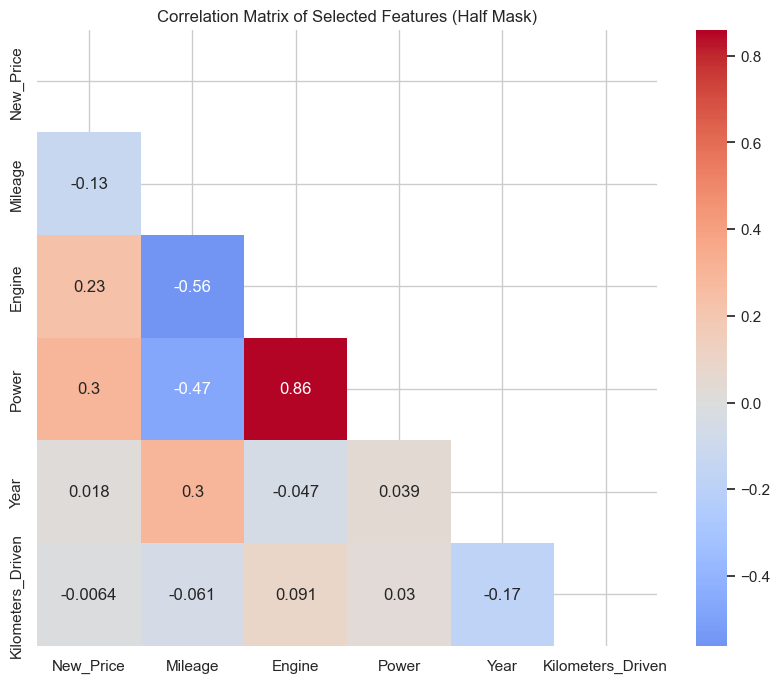

In [ ]:
corr_matrix = df.corr()

selected_columns = ['New_Price', 'Mileage', 'Engine', 'Power', 'Year', 'Kilometers_Driven']
selected_corr_matrix = corr_matrix.loc[selected_columns, selected_columns]

# Plot the correlation matrix with a half mask
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(selected_corr_matrix, dtype=bool))

# Plot the heatmap with the mask
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title('Correlation Matrix of Selected Features (Half Mask)')
plt.show()

#### Why Use a Half Mask in a Correlation Matrix Visualization?

In visualizing correlation matrices, a half mask (or triangular mask) is often used to improve readability and reduce redundancy. Here's why and what benefits it offers:

##### Why Use a Half Mask?

1. **Redundancy Reduction:**
   - A correlation matrix is symmetric, meaning that the value at position (i, j) is the same as at (j, i). Displaying the full matrix results in redundant information. A half mask removes this redundancy by displaying only one half of the matrix.

2. **Improved Clarity:**
   - By masking one half of the matrix, the visualization becomes less cluttered, making it easier to focus on the unique correlations. This is especially useful when dealing with a large number of features.

3. **Aesthetic Appeal:**
   - A half mask can make the heatmap look cleaner and more organized, improving the overall visual appeal of the plot.

##### Benefits of Using a Half Mask

1. **Enhanced Readability:**
   - With fewer cells to interpret, users can more quickly identify and understand the significant correlations. This is particularly useful when presenting data to an audience unfamiliar with the dataset.

2. **Focus on Important Information:**
   - By reducing the amount of displayed information, the visualization directs the viewer's attention to the unique relationships between features, helping them draw insights more efficiently.

3. **Saves Space:**
   - In presentations or reports where space is limited, a half-mask heatmap takes up less room while still conveying all necessary information.

#### Use the np.triu() numpy function to isolate the upper triangle of a matrix while turning all the values in the lower triangle into 0. (The np.tril() function would do the same, only for the lower triangle.) Using the np.ones_like() function will change all the isolated values into 1.
```Python
np.triu(np.ones_like(selected_corr_matrix, dtype=bool))
```
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*mYMvHiyCGrN39X79gFFsNg.png" height="150px">

#### Plot and use the mask
```Python
# Plot the correlation matrix with a half mask
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(selected_corr_matrix, dtype=bool))

# Plot the heatmap with the mask
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title('Correlation Matrix of Selected Features (Half Mask)')
plt.show()

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
```

<br/>
<b><span style="color: red;">Please go to this <a href = "https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e">page</a> and read more!</span></b>

### 3. Distribution of Car Prices


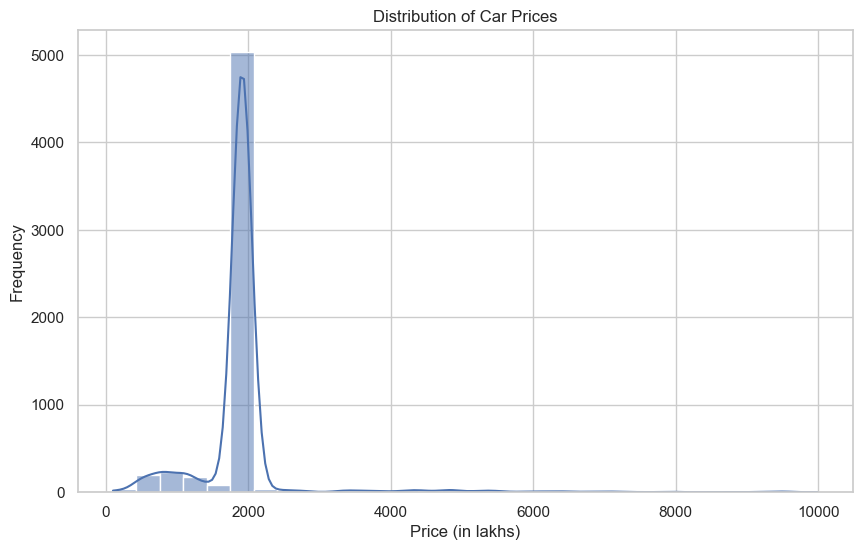

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['New_Price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

### 4. Kilometers Driven vs. Year

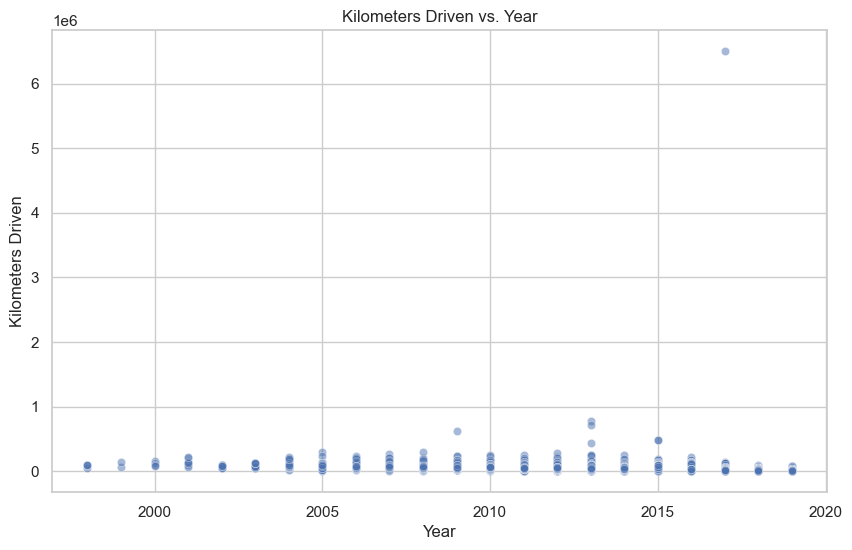

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Kilometers_Driven', alpha=0.5)
plt.title('Kilometers Driven vs. Year')
plt.xlabel('Year')
plt.ylabel('Kilometers Driven')
plt.show()

### 5. Fuel Type Distribution

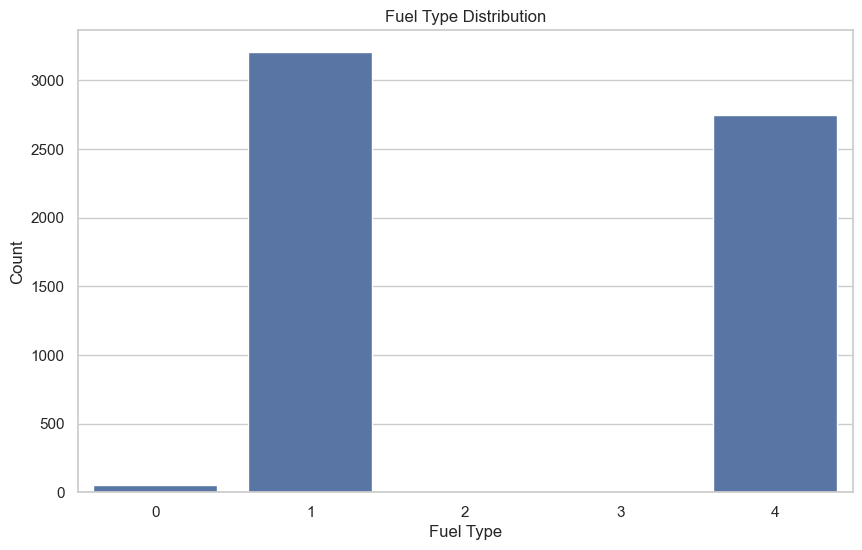

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

### 6. Transmission Type Distribution

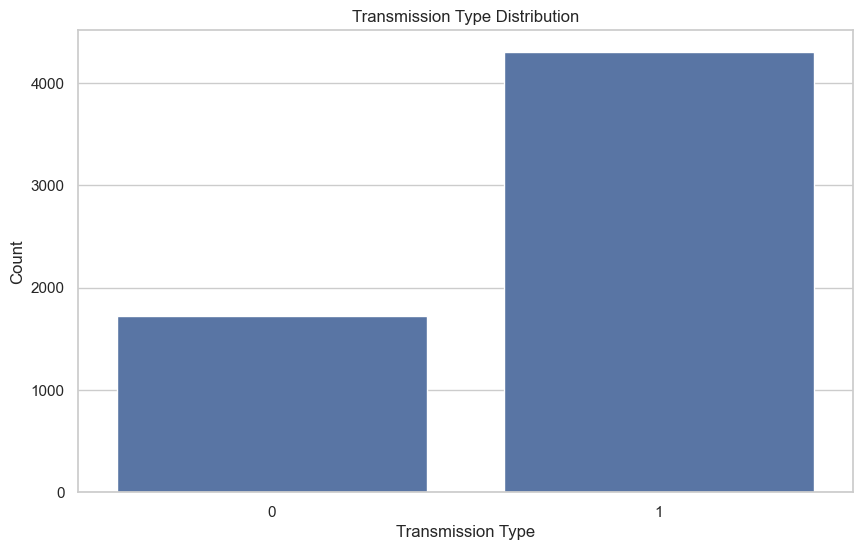

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

### 7. Owner Type Distribution

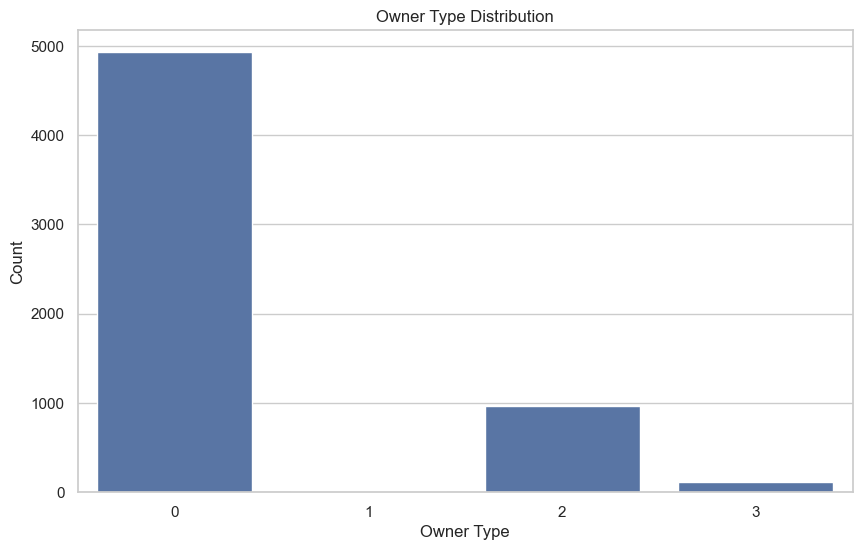

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Owner_Type', data=df)
plt.title('Owner Type Distribution')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.show()

### 8. Correlation between Engine Size and Power

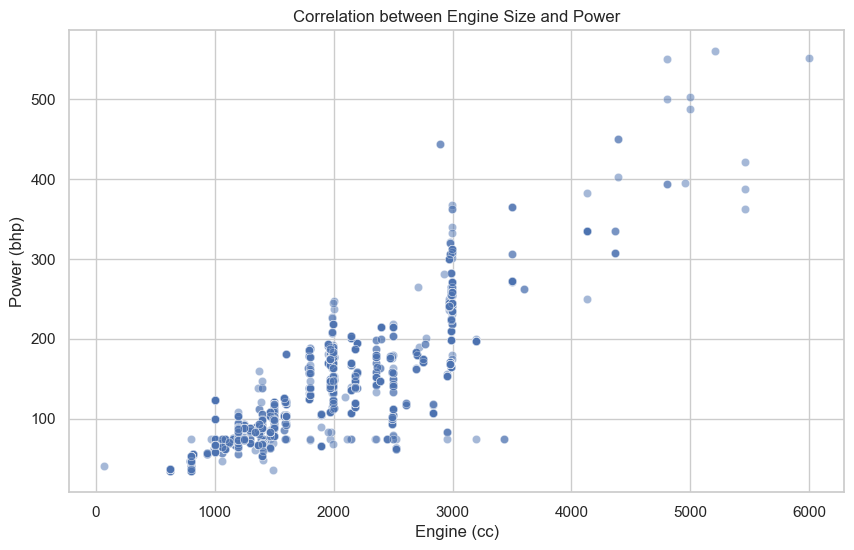

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine', y='Power', alpha=0.5)
plt.title('Correlation between Engine Size and Power')
plt.xlabel('Engine (cc)')
plt.ylabel('Power (bhp)')
plt.show()

### 9. Top 10 Locations with Most Listings

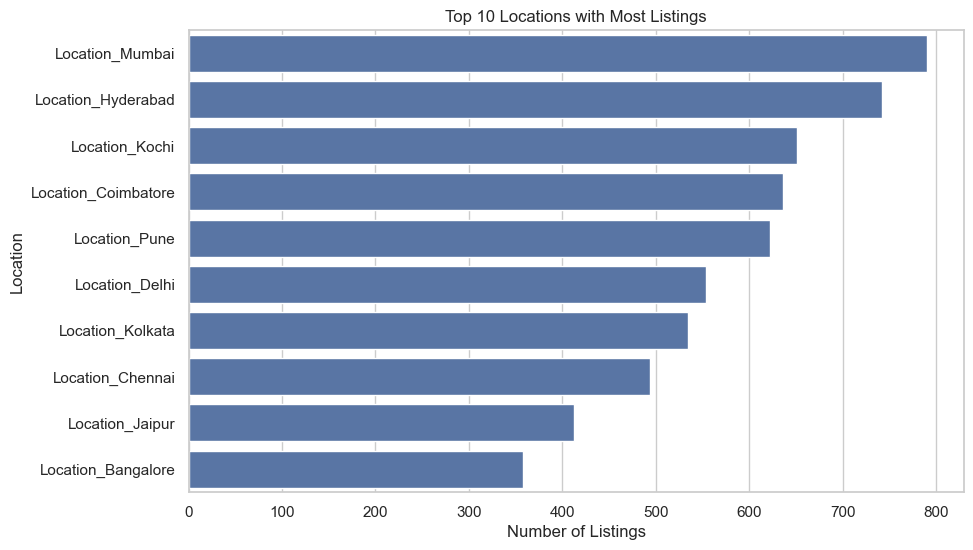

In [ ]:
location_columns = [col for col in df.columns if col.startswith('Location_')]
location_counts = df[location_columns].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index)
plt.title('Top 10 Locations with Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Location')
plt.show()

<h1 style="color: cyan;"> Please add more and share your visualizations on discord! with what insights do you get from your visualizations.</h1>

# 4- Save the dataframe
Never forget to save your data so you don't run the whole code again.

In [ ]:
df.to_csv('cleaned_used_cars.csv', index=False)